<a href="https://colab.research.google.com/github/ninj4-frameture/Funny-3D-Mirrors/blob/main/Funny_Minions_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vcam

In [2]:
import cv2
import numpy as np
import math
from vcam import vcam,meshGen
import matplotlib.pyplot as plt

In [3]:
plt.figure(figsize=(20, 20))
img = cv2.imread('Minions.jpg')

<Figure size 2000x2000 with 0 Axes>

In [4]:
#height and width of image
H,W=img.shape[:2]

In [5]:
c1 = vcam(H=H,W=W)

In [6]:
plane = meshGen(H,W)

In [7]:
plane.Z += 20*np.exp(-0.5*((plane.X*1.0/plane.W)/0.1)**2)/(0.1*np.sqrt(2*np.pi))
pts3d = plane.getPlane()

In [8]:
#projecting the image on the curved surface
pts2d = c1.project(pts3d)
map_x,map_y = c1.getMaps(pts2d)

In [9]:
output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)

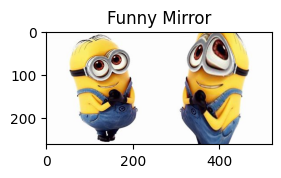

In [10]:
plt.subplot(1, 2,1)
plt.title("Funny Mirror")
plt.imshow(cv2.cvtColor(np.hstack((img,output)), cv2.COLOR_BGR2RGB))